In [3]:
cd ..

/home/hantoine/Documents/Cours/Concordia/2019-Winter/SOEN_691_Big_Data_Analytics/project/accident-prediction-montreal


In [16]:
# %matplotlib notebook
result_dirs = {
# 'BRF_1M': './data/brf_1',
'BRF': './data/brf_2',
# 'BRF_4M': './data/brf_3',
# 'BRF_2M_2': './data/brf_6',
# 'BRF_4M_2': './data/brf_8',
# 'BRF_3M': './data/brf_9',
# 'BRF_4M_8': './data/brf_11',
# 'BRF_2M_8': './data/brf_12',
# 'RF_1M': './data/rf_1',
'RF': './data/urf_2',
'XGB': './data/xgb_68',
'base': './data/sac_3'
}

In [17]:
import pandas as pd

def read_result_file(res_dir):
    with open(res_dir + '/results', 'r') as f:
        file_content = f.read()
        return [float(line.split('=')[1])
                for line in file_content.split('\n')
                if '=' in line]


results = {algo: read_result_file(result_dirs[algo]) for algo in result_dirs.keys()}
results['Set'] = 2*['Test set'] + 2*['Train set']
results['Metric'] = 2*['Area under the PR', 'Area under the ROC']

results = (pd.DataFrame(results)
           .pivot_table(index=['Set', 'Metric'])
           .round(3))
results

BRF     RF    XGB   base
Set       Metric                                        
Test set  Area under the PR   0.547  0.535  0.531  0.370
          Area under the ROC  0.916  0.918  0.909  0.874
Train set Area under the PR   0.699  0.813  0.675  0.370
          Area under the ROC  0.973  0.970  0.977  0.874

In [18]:
print(results.to_latex())

\begin{tabular}{llrrrr}
\toprule
          &                    &    BRF &     RF &    XGB &   base \\
Set & Metric &        &        &        &        \\
\midrule
Test set & Area under the PR &  0.547 &  0.535 &  0.531 &  0.370 \\
          & Area under the ROC &  0.916 &  0.918 &  0.909 &  0.874 \\
Train set & Area under the PR &  0.699 &  0.813 &  0.675 &  0.370 \\
          & Area under the ROC &  0.973 &  0.970 &  0.977 &  0.874 \\
\bottomrule
\end{tabular}



In [19]:
metrics = {algo: pd.read_csv(result_dirs[algo] + '/metrics.csv')
           for algo in result_dirs.keys()}

Text(0.862921, -0.069, '0.85')

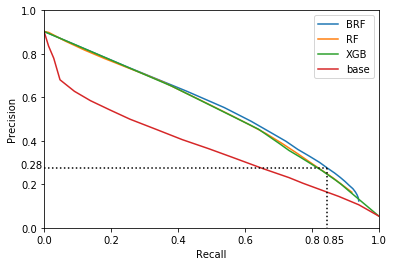

In [20]:
ax = None
for algo in result_dirs.keys(): 
    ax = (metrics[algo][['Recall', 'Precision']]
          .append(pd.DataFrame({"Recall":[0.0], "Precision":[0.903]})) # Obtained with threshold 0.9975
          .rename(columns={'Precision': algo})
          .dropna()
          .plot(x='Recall', y=algo, ax=ax, ylim=(0, 1)))
ax.set_ylabel('Precision')
ax.plot([0.845921, 0.845921], [0.275005, -0.15], color='black', linestyle=':')
ax.plot([0, 0.845921], [0.275005, 0.275005], color='black', linestyle=':')
ax.text(-0.07, 0.275005, '0.28')
ax.text(0.845921 + 0.017, -0.069, '0.85', horizontalalignment='center')

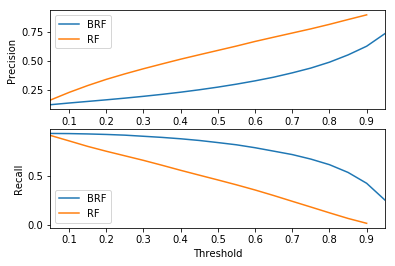

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2)
ax = axes[0]
for algo in result_dirs.keys(): 
    if algo in ['XGB', 'base']:
        continue
    ax = (metrics[algo][['Threshold', 'Recall', 'Precision']]
          .dropna()
          .rename(columns={'Precision': algo, 'Recall': 'Recall ' + algo})
          .plot(x='Threshold', y=[algo], ax=ax))
ax.set_ylabel('Precision')
ax = axes[1]
for algo in result_dirs.keys(): 
    if algo in ['XGB', 'base']:
        continue
    ax = (metrics[algo][['Threshold', 'Recall', 'Precision']]
          .dropna()
          .rename(columns={'Recall': algo})
          .plot(x='Threshold', y=[algo], ax=ax))
ax.set_ylabel('Recall')
None

Text(0.126481, -0.069, '0.13')

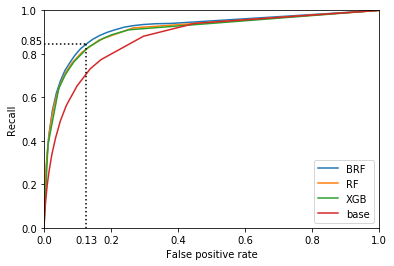

In [23]:
import matplotlib.pyplot as plt
ax = None
for algo in result_dirs.keys():
    ax = (pd.DataFrame({"Recall":[1.0], "False positive rate":[1.0]})
          .append(
              metrics[algo][['Recall', 'False positive rate']]
          )
          .dropna()
          .rename(columns={'Recall': algo})
          .plot(x='False positive rate', y=algo, ax=ax, legend=False, ylim=(0, 1)))
ax.legend(loc='lower right')
ax.set_ylabel('Recall')
ax.plot([0.126481, 0.126481], [0.845921, -0.15], color='black', linestyle=':')
ax.plot([0, 0.126481], [0.845921, 0.845921], color='black', linestyle=':')
ax.text(-0.07, 0.845921, '0.85')
ax.text(0.126481, -0.069, '0.13', horizontalalignment='center')

Text(0, 0.5, 'Feature importance')

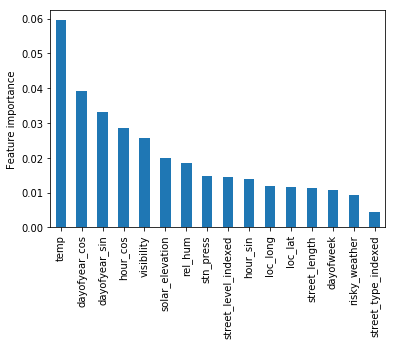

In [12]:
fi = pd.read_csv(result_dirs['BRF']+'/feature_importances.csv')
fi = fi.set_index('Unnamed: 0')
fi = fi.drop(index=['accident_count'])
ax = fi.plot.bar(legend=False)
ax.set_xlabel('')
ax.set_ylabel('Feature importance')

In [11]:
pd.read_csv(result_dirs['BRF']+'/feature_importances.csv')

,Unnamed: 0,Feature importances
0,accident_count,0.672247
1,temp,0.059505
2,dayofyear_cos,0.039301
3,dayofyear_sin,0.033208
4,hour_cos,0.028671
5,visibility,0.025739
6,solar_elevation,0.019842
7,rel_hum,0.018557
8,stn_press,0.014886
9,street_level_indexed,0.014569
